<a href="https://colab.research.google.com/github/NicoSchwarzer/SourceCode_MachineLearning_Python/blob/main/Code_Ass_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment No 6**

Firstly, we are reading in packages and preparing the data

In [2]:


import numpy as np
import pandas as pd 
import os 
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [6]:
a = np.load("digits01.npy", allow_pickle=True).item()

result = a.items()
data = list(result)
data2 = np.array(data, dtype=object)

# finally retrieving data: 
    
# Ytest
print("the values for " + str(data2[0,0]) + " are stored in data2[0,1].")
Ytest =  data2[0,1]

#Xtest
print("the values for " + str(data2[1,0]) + " are stored in data2[1,1].")
Xtest = data2[1,1]

#Xtrain
print("the values for " + str(data2[2,0]) + " are stored in data2[2,1].")
Xtrain = data2[2,1]

#Ytrain
print("the values for " + str(data2[3,0]) + " are stored in data2[3,1].")
Ytrain = data2[3,1]



the values for Ytest are stored in data2[0,1].
the values for Xtest are stored in data2[1,1].
the values for Xtrain are stored in data2[2,1].
the values for Ytrain are stored in data2[3,1].


Next, we are adding the *fill in* parts in the function computing the coordinate ascent 

In [7]:
def CoordinateDescentSVM(Xtrain, Ytrain, C, Xtest, Ytest):
    ''' compute the solution of linear SVM
    Xtrain, Ytrain: training set
    Xtest, Ytest: test set (only to monitor test error)
    C: error parameter

    w: weights linear SVM
    TrainError, TestError: training and test errors over iterations
    '''
    n = Xtrain.shape[0]
    alpha = np.zeros([n, 1]) # initialize dual variables
    w = Xtrain.T @ (Ytrain * alpha) # initialize primal variables
    
    # works since ai -> n*1, Ytrain -> n * 1 --> pointwise to n * 1
    # X.T -> d * n

    counter = 0
    converged = False
    eps = 1e-3
    TrainError, TestError = [], []
    
    
    while  not converged:
            
        # select coordinate to update
        r = counter % n


        # solve the subproblem for coordinate r without any constraints
    
        # data on r 
        Yr = Ytrain[r]  
        Xr = Xtrain[r, :]
        Xr_inner = np.matmul(Xr.T, Xr)
        
        # data on the rest 
        alpha_i = np.delete(alpha, r)
        Y_i = np.delete(Ytrain, r)
        X_i = np.delete(Xtrain, r, axis = 0)
        
        # calculation
        
        a1 = (alpha_i * Y_i)
        a2 = np.matmul(a1, X_i)
        a3 = np.matmul(a2, Xr)
        
        ar_1 = 1 / Xr_inner - a3 * Yr / Xr_inner
        

        # project the solution to the interval [0, C / n]

        ar = max(0,min(ar_1, C/n))
        
        # into alpha again
        alpha[r] = ar


        # monitor the progress of the method computing the dual
        # objective DualObj
        
        b1 = np.sum(alpha) 
        b2 = (Ytrain *  alpha).T
        b3 = np.matmul(Xtrain, Xtrain.T)
        b4 = (Ytrain *  alpha)
        b5 = np.matmul(b2, b3)
        b6 = np.matmul(b5, b4)
        
        DualObj = b1 - 0.5 * b6
        

        if (counter + 1) % 100 == 0:
            print('iteration={} dual obj={:.3f}'.format(
                counter + 1, float(DualObj) ) ) 

        # compute the training and test error with the current iterate alpha
        
        # using hinge loss 
        
        w = Xtrain.T @ ( Ytrain * alpha )
        
        a_train = np.ones([n,1]) -   Ytrain * np.matmul(Xtrain, w)  
        a_train2 = np.maximum(a_train, np.zeros([n,1]))
        TrainError_1 = C / n * np.sum(a_train2)
        TrainError.append(TrainError_1)
        
        n2 = Xtest.shape[0]
        
        a_test = np.ones([n2,1]) -   Ytest * np.matmul(Xtest, w)  
        a_test2 = np.maximum(a_test, np.zeros([n2,1]))
        TestError_1 = C / n * np.sum(a_test2)
        TestError.append(TestError_1)
        

        # if the KKT conditions are satisfied up to the tolerance eps by the
        # the current iterate alpha then set converged = True
        
        # checking complementary slackness:
        
        c1 = np.ones([n,1])
#       c2 = np.ones([n,1]) * eps
        c3 = np.matmul(Xtrain, w)
        c4 = Ytrain * c3
        c5 = c1 - c4
        
        c6 = alpha * c5
        
        
        # if alpha * (1- Y * X * w) is smaller than the threshold of epsilon,
        # set the counter to converged
    
        eps_2 = np.ones([n,1]) * eps
        check = abs(c6) > eps_2
        
        if sum(check) == 0:
            converged = True
        
        
        # counter += 1 
        counter += 1


        
    # compute the primal solution w from alpha
    
    # using hinge loss 
    # muss nichts mehr gemacht werden :D
    
#    w = Xtrain.T @ (Ytrain * alpha)
    
#    a_train = np.ones([n,1]) -   Ytrain * np.matmul(Xtrain, w)  
#    a_train2 = np.maximum(a_train, np.zeros([n,1]))
#    TrainError = np.sum(a_train2)
    
#    n2 = Xtest.shape[0]
    
#    a_test = np.ones([n2,1]) -   Ytest * np.matmul(Xtest, w)  
#    a_test2 = np.maximum(a_test, np.zeros([n2,1]))
#    TestError = np.sum(a_test2)
    

    # show final dual objective
    print('final iteration={} dual obj={:.3f}'.format(counter, DualObj))

    return w, TrainError, TestError


Now, we call that function for different C values, i.e. 10,100,200, 500. Note the comments below the next code chunk.

In [8]:
w, TrainError, TestError = CoordinateDescentSVM(Xtrain, Ytrain, 10, Xtest, Ytest)
TrainError_10 = TrainError
TestError_10 = TestError


w, TrainError, TestError = CoordinateDescentSVM(Xtrain, Ytrain, 100, Xtest, Ytest)
TrainError_100 = TrainError
TestError_100 = TestError


w, TrainError, TestError = CoordinateDescentSVM(Xtrain, Ytrain, 200, Xtest, Ytest)
TrainError_200 = TrainError
TestError_200 = TestError


w, TrainError, TestError  = CoordinateDescentSVM(Xtrain, Ytrain, 500, Xtest, Ytest)
TrainError_500 = TrainError
TestError_500 = TestError


iteration=2500 dual obj=9.768


KeyboardInterrupt: ignored

As can be seen  when executing the cell above, the dual objective function coverges, yet the stopping criteroin does not seem do ever be met. This is why we recoded the coordinate ascent function so that is stops after a set number of iterations.

In [9]:

def CoordinateDescentSVM_2(Xtrain, Ytrain, C, Xtest, Ytest):
    ''' compute the solution of linear SVM
    Xtrain, Ytrain: training set
    Xtest, Ytest: test set (only to monitor test error)
    C: error parameter

    w: weights linear SVM
    TrainError, TestError: training and test errors over iterations
    '''
    n = Xtrain.shape[0]
    alpha = np.zeros([n, 1]) # initialize dual variables
    w = Xtrain.T @ (Ytrain * alpha) # initialize primal variables
    
    # works since ai -> n*1, Ytrain -> n * 1 --> pointwise to n * 1
    # X.T -> d * n

    counter = 0
    converged = False
    eps = 1e-3
    TrainError, TestError = [], []
    
    
    while  counter < 3000:
            
        # select coordinate to update
        r = counter % n

# r = 3
# C = 100


        # solve the subproblem for coordinate r without any constraints
    
        # data on r 
        Yr = Ytrain[r]  
        Xr = Xtrain[r, :]
        Xr_inner = np.matmul(Xr.T, Xr)
        
        # data on the rest 
        alpha_i = np.delete(alpha, r)
        Y_i = np.delete(Ytrain, r)
        X_i = np.delete(Xtrain, r, axis = 0)
        
        # calculation
        
        a1 = (alpha_i * Y_i)
        a2 = np.matmul(a1, X_i)
        a3 = np.matmul(a2, Xr)
        
        ar_1 = 1 / Xr_inner - a3 * Yr / Xr_inner
        

        # project the solution to the interval [0, C / n]

        ar = max(0,min(ar_1, C/n))
        
        # into alpha again
        alpha[r] = ar


        # monitor the progress of the method computing the dual
        # objective DualObj
        
        b1 = np.sum(alpha) 
        b2 = (Ytrain *  alpha).T
        b3 = np.matmul(Xtrain, Xtrain.T)
        b4 = (Ytrain *  alpha)
        b5 = np.matmul(b2, b3)
        b6 = np.matmul(b5, b4)
        
        DualObj = b1 - 0.5 * b6
        

        if (counter + 1) % 100 == 0:
            print('iteration={} dual obj={:.3f}'.format(
                counter + 1, float(DualObj) ) ) 

        # compute the training and test error with the current iterate alpha
        
        # using hinge loss 
        
        w = Xtrain.T @ ( Ytrain * alpha )
        
        a_train = np.ones([n,1]) -   Ytrain * np.matmul(Xtrain, w)  
        a_train2 = np.maximum(a_train, np.zeros([n,1]))
        TrainError_1 = C / n * np.sum(a_train2)
        TrainError.append(TrainError_1)
        
        n2 = Xtest.shape[0]
        
        a_test = np.ones([n2,1]) -   Ytest * np.matmul(Xtest, w)  
        a_test2 = np.maximum(a_test, np.zeros([n2,1]))
        TestError_1 = C / n2 * np.sum(a_test2)
        TestError.append(TestError_1)
        

        # if the KKT conditions are satisfied up to the tolerance eps by the
        # the current iterate alpha then set converged = True
        
        # checking complementary slackness:
        
        c1 = np.ones([n,1])
#       c2 = np.ones([n,1]) * eps
        c3 = np.matmul(Xtrain, w)
        c4 = Ytrain * c3
        c5 = c1 - c4
        
        c6 = alpha * c5
        
        
        # if alpha * (1- Y * X * w) is smaller than the threshold of epsilon,
        # set the counter to converged
    
        eps_2 = np.ones([n,1]) * eps
        check = abs(c6) > eps_2
        
        #if sum(check) == 0:
        #    converged = True
        
        
        TrainError_final, TestError_final = TrainError, TestError
        
        
        # counter += 1 
        counter += 1


        
    # compute the primal solution w from alpha
    
    # using hinge loss 
    # muss nichts mehr gemacht werden :D
    
#    w = Xtrain.T @ (Ytrain * alpha)
    
#    a_train = np.ones([n,1]) -   Ytrain * np.matmul(Xtrain, w)  
#    a_train2 = np.maximum(a_train, np.zeros([n,1]))
#    TrainError = np.sum(a_train2)
    
#    n2 = Xtest.shape[0]
    
#    a_test = np.ones([n2,1]) -   Ytest * np.matmul(Xtest, w)  
#    a_test2 = np.maximum(a_test, np.zeros([n2,1]))
#    TestError = np.sum(a_test2)
    

    # show final dual objective
    #print('final iteration={} dual obj={:.3f}'.format(counter, DualObj))

    return w, TrainError_final, TestError_final



Once again, we are calling the fuction  on different values of C and plotting the resulting Training and Testing Error Curves. We shall start with C = 10.

iteration=100 dual obj=0.499
iteration=200 dual obj=0.998
iteration=300 dual obj=1.495
iteration=400 dual obj=1.991
iteration=500 dual obj=2.486
iteration=600 dual obj=2.979
iteration=700 dual obj=3.472
iteration=800 dual obj=3.963
iteration=900 dual obj=4.453
iteration=1000 dual obj=4.942
iteration=1100 dual obj=5.431
iteration=1200 dual obj=5.917
iteration=1300 dual obj=6.403
iteration=1400 dual obj=6.887
iteration=1500 dual obj=7.369
iteration=1600 dual obj=7.853
iteration=1700 dual obj=8.335
iteration=1800 dual obj=8.814
iteration=1900 dual obj=9.290
iteration=2000 dual obj=9.768
iteration=2100 dual obj=9.768
iteration=2200 dual obj=9.768
iteration=2300 dual obj=9.768
iteration=2400 dual obj=9.768
iteration=2500 dual obj=9.768
iteration=2600 dual obj=9.768
iteration=2700 dual obj=9.768
iteration=2800 dual obj=9.768
iteration=2900 dual obj=9.768
iteration=3000 dual obj=9.768


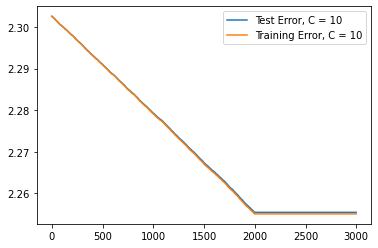

In [10]:
w, TrainError_final, TestError_final = CoordinateDescentSVM_2(Xtrain, Ytrain, 10, Xtest, Ytest)
TrainError_10 = np.log(TrainError_final)
TestError_10 = np.log(TestError_final)

plt.figure()
plt.plot(TestError_10)
plt.plot(TrainError_10)
plt.legend(["Test Error, C = 10", "Training Error, C = 10"])
plt.show()


We can see that both losses decrease linearly and after 2000  iterations do not decrease any further. It is noteworthy that 2000 is the size of our training set. This would indicate that after each alpha has been updated once, the optimal solution has been found.

Next for C = 100

iteration=100 dual obj=4.940
iteration=200 dual obj=9.772
iteration=300 dual obj=14.481
iteration=400 dual obj=19.056
iteration=500 dual obj=23.553
iteration=600 dual obj=27.913
iteration=700 dual obj=32.172
iteration=800 dual obj=36.299
iteration=900 dual obj=40.305
iteration=1000 dual obj=44.211
iteration=1100 dual obj=48.114
iteration=1200 dual obj=51.705
iteration=1300 dual obj=55.250
iteration=1400 dual obj=58.694
iteration=1500 dual obj=61.911
iteration=1600 dual obj=65.257
iteration=1700 dual obj=68.475
iteration=1800 dual obj=71.366
iteration=1900 dual obj=73.996
iteration=2000 dual obj=76.803
iteration=2100 dual obj=76.803
iteration=2200 dual obj=76.803
iteration=2300 dual obj=76.803
iteration=2400 dual obj=76.803
iteration=2500 dual obj=76.803
iteration=2600 dual obj=76.803
iteration=2700 dual obj=76.803
iteration=2800 dual obj=76.803
iteration=2900 dual obj=76.803
iteration=3000 dual obj=76.803


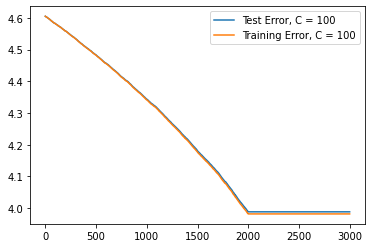

In [11]:

w, TrainError_final, TestError_final = CoordinateDescentSVM_2(Xtrain, Ytrain, 100, Xtest, Ytest)
TrainError_100 = np.log(TrainError_final)
TestError_100 = np.log(TestError_final)

plt.figure()
plt.plot(TestError_100)
plt.plot(TrainError_100)
plt.legend(["Test Error, C = 100", "Training Error, C = 100"])
plt.show()

Once again, we notice that the errors stop decreasing at 2000 iterations. 

For C = 200:

iteration=100 dual obj=9.761
iteration=200 dual obj=19.087
iteration=300 dual obj=27.926
iteration=400 dual obj=36.225
iteration=500 dual obj=44.214
iteration=600 dual obj=51.653
iteration=700 dual obj=58.688
iteration=800 dual obj=65.196
iteration=900 dual obj=71.221
iteration=1000 dual obj=76.845
iteration=1100 dual obj=82.456
iteration=1200 dual obj=86.821
iteration=1300 dual obj=91.001
iteration=1400 dual obj=94.777
iteration=1500 dual obj=97.685
iteration=1600 dual obj=101.242
iteration=1700 dual obj=104.334
iteration=1800 dual obj=106.578
iteration=1900 dual obj=108.286
iteration=2000 dual obj=110.662
iteration=2100 dual obj=110.809
iteration=2200 dual obj=110.901
iteration=2300 dual obj=110.984
iteration=2400 dual obj=111.001
iteration=2500 dual obj=111.125
iteration=2600 dual obj=111.163
iteration=2700 dual obj=111.199
iteration=2800 dual obj=111.268
iteration=2900 dual obj=111.307
iteration=3000 dual obj=111.333


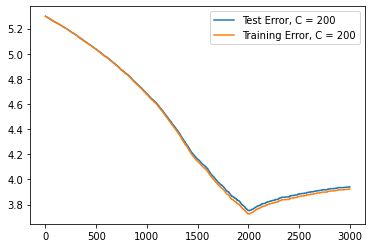

In [12]:
w, TrainError_final, TestError_final = CoordinateDescentSVM_2(Xtrain, Ytrain, 200, Xtest, Ytest)

TrainError_200 = np.log(TrainError_final)
TestError_200 = np.log(TestError_final)

plt.figure()
plt.plot(TestError_200)
plt.plot(TrainError_200)
plt.legend(["Test Error, C = 200", "Training Error, C = 200"])
plt.show()


Again, the losses decrease during the first 2000 iterations. However, the seem to be increasing afterwards. 

For C = 500 

iteration=100 dual obj=23.506
iteration=200 dual obj=44.293
iteration=300 dual obj=62.037
iteration=400 dual obj=76.406
iteration=500 dual obj=88.836
iteration=600 dual obj=97.856
iteration=700 dual obj=105.191
iteration=800 dual obj=110.541
iteration=900 dual obj=115.226
iteration=1000 dual obj=119.085
iteration=1100 dual obj=123.084
iteration=1200 dual obj=125.445
iteration=1300 dual obj=128.110
iteration=1400 dual obj=131.010
iteration=1500 dual obj=132.700
iteration=1600 dual obj=135.691
iteration=1700 dual obj=137.248
iteration=1800 dual obj=138.803
iteration=1900 dual obj=140.031
iteration=2000 dual obj=141.889
iteration=2100 dual obj=146.384
iteration=2200 dual obj=149.759
iteration=2300 dual obj=152.104
iteration=2400 dual obj=153.859
iteration=2500 dual obj=155.195
iteration=2600 dual obj=155.718
iteration=2700 dual obj=156.104
iteration=2800 dual obj=156.235
iteration=2900 dual obj=156.250
iteration=3000 dual obj=156.258


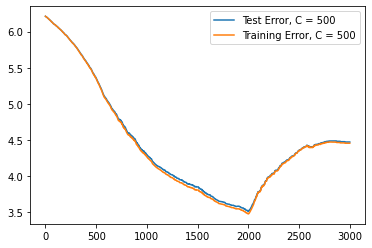

In [13]:

w, TrainError_final, TestError_final = CoordinateDescentSVM_2(Xtrain, Ytrain, 500, Xtest, Ytest)

TrainError_500 = np.log(TrainError_final)
TestError_500 = np.log(TestError_final)

plt.figure()
plt.plot(TestError_500)
plt.plot(TrainError_500)
plt.legend(["Test Error, C = 500", "Training Error, C = 500"])
plt.show()
